# Taller 4: Matrices Hermíticas, Unitarias y Productos Tensorial

**Estudiante:** Andersson Programming  
**Curso:** Ciencias de la Computación  
**Fecha:** Septiembre 2025

## Objetivos
- Analizar propiedades de matrices hermíticas y unitarias
- Implementar productos tensoriales entre matrices y vectores
- Simular circuitos cuánticos básicos
- Aplicar conceptos a sistemas cuánticos simples

---

## Fundamentos Teóricos

### Matrices Hermíticas
Una matriz A es hermítica si A = A†, donde A† es la transpuesta conjugada.
- Todos los valores propios son reales
- Los vectores propios son ortogonales
- Pueden representar observables en mecánica cuántica

### Matrices Unitarias
Una matriz U es unitaria si U†U = UU† = I.
- Preservan la norma: ‖Uv‖ = ‖v‖
- Todos los valores propios tienen módulo 1
- Representan evoluciones cuánticas

### Producto Tensorial
Para matrices A (m×n) y B (p×q), el producto tensorial A ⊗ B es una matriz (mp×nq):
(A ⊗ B)ᵢⱼ,ₖₗ = Aᵢₖ · Bⱼₗ

In [2]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from scipy.linalg import expm, logm
import warnings
warnings.filterwarnings('ignore')

# Try to import custom modules, create basic implementations if not available
try:
    # Configuración para importar nuestros módulos
    sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), 'src'))
    from complex_vector_operations import ComplexVectorOperations
    from complex_matrix_operations import ComplexMatrixOperations  
    from advanced_operations import AdvancedOperations
    
    # Crear instancias de las clases de operaciones
    vector_ops = ComplexVectorOperations()
    matrix_ops = ComplexMatrixOperations()
    advanced_ops = AdvancedOperations()
    print("Custom modules loaded successfully")
    
except ImportError:
    print("Custom modules not found. Creating basic implementations...")
    
    # Create basic implementations for the required functionality
    class BasicOperations:
        @staticmethod
        def tensor_product(A, B):
            """Compute tensor product of two arrays"""
            return np.kron(A, B)
    
    # Use the basic implementation
    advanced_ops = BasicOperations()
    vector_ops = None
    matrix_ops = None
    print("Using basic numpy implementations")

print("=== TALLER 4: MATRICES HERMÍTICAS, UNITARIAS Y PRODUCTOS TENSORIALES ===")
print("Módulos cargados exitosamente")
print(f"NumPy version: {np.__version__}")
print(f"SciPy disponible para cálculos matriciales avanzados")
print()

# Configurar formato de salida
np.set_printoptions(precision=4, suppress=True, linewidth=120)

# Función auxiliar para verificar si una matriz es hermítica
def es_hermitica(A, tol=1e-10):
    return np.allclose(A, A.T.conj(), atol=tol)

# Función auxiliar para verificar si una matriz es unitaria
def es_unitaria(U, tol=1e-10):
    return np.allclose(U @ U.T.conj(), np.eye(U.shape[0]), atol=tol)

print("Funciones auxiliares definidas.")
print()

Custom modules not found. Creating basic implementations...
Using basic numpy implementations
=== TALLER 4: MATRICES HERMÍTICAS, UNITARIAS Y PRODUCTOS TENSORIALES ===
Módulos cargados exitosamente
NumPy version: 2.1.2
SciPy disponible para cálculos matriciales avanzados

Funciones auxiliares definidas.



## 1. Análisis Detallado de Matrices Hermíticas

Estudio completo de las propiedades de matrices hermíticas.

In [3]:
print("=== ANÁLISIS DE MATRICES HERMÍTICAS ===")
print()

# Definir matriz hermítica ejemplo
print("MATRIZ HERMÍTICA EJEMPLO:")
H1 = np.array([[3+0j, 1-2j, 0+1j],
               [1+2j, 2+0j, 1-1j],
               [0-1j, 1+1j, 1+0j]], dtype=complex)

print("H1 =")
print(H1)
print("\nH1† (adjunta) =")
H1_adj = H1.T.conj()
print(H1_adj)

# Verificar que es hermítica
print(f"\n¿Es hermítica? {es_hermitica(H1)}")
print(f"Error ||H - H†||: {np.linalg.norm(H1 - H1_adj):.2e}")
print()

# Calcular valores y vectores propios
eigenvals_H1, eigenvecs_H1 = np.linalg.eigh(H1)
print("DESCOMPOSICIÓN ESPECTRAL:")
print(f"Valores propios (todos reales): {eigenvals_H1}")
print(f"¿Son todos reales? {np.allclose(np.imag(eigenvals_H1), 0)}")
print()

# Verificar ortogonalidad de vectores propios
print("VECTORES PROPIOS:")
for i, (val, vec) in enumerate(zip(eigenvals_H1, eigenvecs_H1.T)):
    print(f"λ{i+1} = {val:.6f}")
    print(f"v{i+1} = {vec}")
    print(f"‖v{i+1}‖ = {np.linalg.norm(vec):.6f}")
    print()

print("VERIFICACIÓN DE ORTOGONALIDAD:")
for i in range(len(eigenvals_H1)):
    for j in range(i+1, len(eigenvals_H1)):
        producto = np.vdot(eigenvecs_H1[:, i], eigenvecs_H1[:, j])
        print(f"⟨v{i+1},v{j+1}⟩ = {producto:.2e}")

# Verificar que los vectores propios forman una base ortonormal
U_H1 = eigenvecs_H1
es_ortonormal = np.allclose(U_H1.T.conj() @ U_H1, np.eye(3))
print(f"\n¿Los vectores propios forman base ortonormal? {es_ortonormal}")
print()

# Reconstruir la matriz usando descomposición espectral
print("RECONSTRUCCIÓN USANDO DESCOMPOSICIÓN ESPECTRAL:")
D_H1 = np.diag(eigenvals_H1)
H1_reconstruida = U_H1 @ D_H1 @ U_H1.T.conj()
error_recons = np.linalg.norm(H1 - H1_reconstruida)
print(f"H1 = UDU† donde:")
print(f"D = diag({eigenvals_H1})")
print(f"Error de reconstrucción: {error_recons:.2e}")
print()

# Crear matriz hermítica a partir de cualquier matriz
print("CONSTRUCCIÓN DE MATRIZ HERMÍTICA:")
A_random = np.random.rand(3, 3) + 1j * np.random.rand(3, 3)
H_constructed = (A_random + A_random.T.conj()) / 2

print("Matriz aleatoria A:")
print(A_random)
print("\nMatriz hermítica H = (A + A†)/2:")
print(H_constructed)
print(f"¿Es hermítica? {es_hermitica(H_constructed)}")
print()

# Propiedades especiales de matrices hermíticas
print("PROPIEDADES ESPECIALES:")

# 1. La traza es real
traza_H1 = np.trace(H1)
print(f"1. Traza: tr(H1) = {traza_H1}")
print(f"   ¿Es real? {np.isreal(traza_H1)}")

# 2. El determinante es real
det_H1 = np.linalg.det(H1)
print(f"\n2. Determinante: det(H1) = {det_H1}")
print(f"   ¿Es real? {np.isreal(det_H1)}")

# 3. Las potencias pares son hermíticas
H1_squared = H1 @ H1
print(f"\n3. H1² es hermítica: {es_hermitica(H1_squared)}")

# 4. exp(iH) es unitaria para H hermítica
i_H1 = 1j * H1
exp_iH1 = expm(i_H1)
print(f"\n4. exp(iH1) es unitaria: {es_unitaria(exp_iH1)}")
print()

=== ANÁLISIS DE MATRICES HERMÍTICAS ===

MATRIZ HERMÍTICA EJEMPLO:
H1 =
[[3.+0.j 1.-2.j 0.+1.j]
 [1.+2.j 2.+0.j 1.-1.j]
 [0.-1.j 1.+1.j 1.+0.j]]

H1† (adjunta) =
[[3.-0.j 1.-2.j 0.+1.j]
 [1.+2.j 2.-0.j 1.-1.j]
 [0.-1.j 1.+1.j 1.-0.j]]

¿Es hermítica? True
Error ||H - H†||: 0.00e+00

DESCOMPOSICIÓN ESPECTRAL:
Valores propios (todos reales): [-1.1545  2.3376  4.8169]
¿Son todos reales? True

VECTORES PROPIOS:
λ1 = -1.154523
v1 = [-0.4796-0.j      0.3154+0.5308j  0.1   -0.6154j]
‖v1‖ = 1.000000

λ2 = 2.337609
v2 = [-0.4229+0.j      0.0922+0.4575j -0.2731+0.7271j]
‖v2‖ = 1.000000

λ3 = 4.816914
v3 = [-0.7689+0.j     -0.2475-0.5828j  0.0879-0.0161j]
‖v3‖ = 1.000000

VERIFICACIÓN DE ORTOGONALIDAD:
⟨v1,v2⟩ = -5.55e-17+5.55e-17j
⟨v1,v3⟩ = 0.00e+00-1.11e-16j
⟨v2,v3⟩ = -5.55e-17-4.16e-17j

¿Los vectores propios forman base ortonormal? True

RECONSTRUCCIÓN USANDO DESCOMPOSICIÓN ESPECTRAL:
H1 = UDU† donde:
D = diag([-1.1545  2.3376  4.8169])
Error de reconstrucción: 2.91e-15

CONSTRUCCIÓN DE MATRI

## 2. Análisis Detallado de Matrices Unitarias

Estudio completo de las propiedades de matrices unitarias.

In [4]:
print("=== ANÁLISIS DE MATRICES UNITARIAS ===")
print()

# Matrices de Pauli (fundamentales en mecánica cuántica)
print("MATRICES DE PAULI:")
I = np.array([[1, 0], [0, 1]], dtype=complex)  # Identidad
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)  # Pauli-X
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)  # Pauli-Y
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)  # Pauli-Z

pauli_matrices = [('I', I), ('σₓ', sigma_x), ('σᵧ', sigma_y), ('σᵤ', sigma_z)]

for nombre, matriz in pauli_matrices:
    print(f"\n{nombre} =")
    print(matriz)
    print(f"¿Es hermítica? {es_hermitica(matriz)}")
    print(f"¿Es unitaria? {es_unitaria(matriz)}")
    
    # Calcular valores propios
    eigenvals, _ = np.linalg.eig(matriz)
    print(f"Valores propios: {eigenvals}")
    print(f"Módulos: {np.abs(eigenvals)}")

print()

# Puertas cuánticas (matrices unitarias 2×2)
print("PUERTAS CUÁNTICAS COMUNES:")

# Puerta Hadamard
H_gate = np.array([[1, 1], [1, -1]], dtype=complex) / np.sqrt(2)
print("\nPuerta Hadamard:")
print(H_gate)
print(f"¿Es unitaria? {es_unitaria(H_gate)}")

# Puerta de fase
phi = np.pi/4
S_gate = np.array([[1, 0], [0, np.exp(1j*phi)]], dtype=complex)
print(f"\nPuerta de fase (φ = π/4):")
print(S_gate)
print(f"¿Es unitaria? {es_unitaria(S_gate)}")

# Puerta de rotación en Y
theta = np.pi/3
R_y = np.array([[np.cos(theta/2), -np.sin(theta/2)],
                [np.sin(theta/2), np.cos(theta/2)]], dtype=complex)
print(f"\nPuerta de rotación Y (θ = π/3):")
print(R_y)
print(f"¿Es unitaria? {es_unitaria(R_y)}")
print()

# Verificar preservación de norma
print("VERIFICACIÓN DE PRESERVACIÓN DE NORMA:")
estados_test = [
    np.array([1, 0], dtype=complex),  # |0⟩
    np.array([0, 1], dtype=complex),  # |1⟩
    np.array([1, 1], dtype=complex) / np.sqrt(2),  # |+⟩
    np.array([1, -1], dtype=complex) / np.sqrt(2),  # |-⟩
    np.array([1, 1j], dtype=complex) / np.sqrt(2)   # |+i⟩
]

nombres_estados = ['|0⟩', '|1⟩', '|+⟩', '|-⟩', '|+i⟩']

for i, (estado, nombre) in enumerate(zip(estados_test, nombres_estados)):
    norma_original = np.linalg.norm(estado)
    print(f"\nEstado {nombre}: {estado}")
    print(f"Norma original: {norma_original:.6f}")
    
    for gate_name, gate in [('H', H_gate), ('X', sigma_x), ('Ry', R_y)]:
        estado_transformado = gate @ estado
        norma_transformada = np.linalg.norm(estado_transformado)
        print(f"  {gate_name}|ψ⟩: norma = {norma_transformada:.6f}, preservada: {np.isclose(norma_original, norma_transformada)}")
print()

# Composición de matrices unitarias
print("COMPOSICIÓN DE MATRICES UNITARIAS:")
U1 = H_gate
U2 = sigma_x
U3 = S_gate

# El producto de matrices unitarias es unitario
U_comp = U3 @ U2 @ U1
print(f"U₃ ∘ U₂ ∘ U₁ (H → X → S):")
print(U_comp)
print(f"¿Es unitaria la composición? {es_unitaria(U_comp)}")
print()

# Generación de matrices unitarias a partir de hermíticas
print("GENERACIÓN DE UNITARIAS DESDE HERMÍTICAS:")
# Para cualquier matriz hermítica H, exp(iH) es unitaria
H_ejemplo = np.array([[1, 0.5j], [-0.5j, -1]], dtype=complex)
print(f"Matriz hermítica H:")
print(H_ejemplo)
print(f"¿Es hermítica? {es_hermitica(H_ejemplo)}")

U_from_H = expm(1j * H_ejemplo)
print(f"\nU = exp(iH):")
print(U_from_H)
print(f"¿Es unitaria? {es_unitaria(U_from_H)}")

# La inversa: log(U)/(i) debería ser hermítica
if es_unitaria(U_from_H):
    H_recovered = -1j * logm(U_from_H)
    print(f"\nH recuperada = -i·log(U):")
    print(H_recovered)
    print(f"¿Es hermítica? {es_hermitica(H_recovered)}")
    error_recovery = np.linalg.norm(H_ejemplo - H_recovered)
    print(f"Error de recuperación: {error_recovery:.2e}")
print()

=== ANÁLISIS DE MATRICES UNITARIAS ===

MATRICES DE PAULI:

I =
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
¿Es hermítica? True
¿Es unitaria? True
Valores propios: [1.+0.j 1.+0.j]
Módulos: [1. 1.]

σₓ =
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
¿Es hermítica? True
¿Es unitaria? True
Valores propios: [ 1.+0.j -1.+0.j]
Módulos: [1. 1.]

σᵧ =
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
¿Es hermítica? True
¿Es unitaria? True
Valores propios: [ 1.+0.j -1.+0.j]
Módulos: [1. 1.]

σᵤ =
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]
¿Es hermítica? True
¿Es unitaria? True
Valores propios: [ 1.+0.j -1.+0.j]
Módulos: [1. 1.]

PUERTAS CUÁNTICAS COMUNES:

Puerta Hadamard:
[[ 0.7071+0.j  0.7071+0.j]
 [ 0.7071+0.j -0.7071+0.j]]
¿Es unitaria? True

Puerta de fase (φ = π/4):
[[1.    +0.j     0.    +0.j    ]
 [0.    +0.j     0.7071+0.7071j]]
¿Es unitaria? True

Puerta de rotación Y (θ = π/3):
[[ 0.866+0.j -0.5  +0.j]
 [ 0.5  +0.j  0.866+0.j]]
¿Es unitaria? True

VERIFICACIÓN DE PRESERVACIÓN DE NORMA:

Estado |0⟩: [1.+0.j 0.+0.j]
Nor

## 3. Producto Tensorial: Teoría e Implementación

Implementación completa del producto tensorial para vectores y matrices.

In [5]:
print("=== PRODUCTO TENSORIAL ===")
print()

# Implementar producto tensorial usando nuestra clase advanced_ops
print("PRODUCTO TENSORIAL DE VECTORES:")

# Estados cuánticos de un qubit
estado_0 = np.array([1, 0], dtype=complex)
estado_1 = np.array([0, 1], dtype=complex)
estado_plus = np.array([1, 1], dtype=complex) / np.sqrt(2)
estado_minus = np.array([1, -1], dtype=complex) / np.sqrt(2)

print("Estados de un qubit:")
print(f"|0⟩ = {estado_0}")
print(f"|1⟩ = {estado_1}")
print(f"|+⟩ = {estado_plus}")
print(f"|-⟩ = {estado_minus}")
print()

# Productos tensoriales de estados de dos qubits
print("ESTADOS DE DOS QUBITS (productos tensoriales):")

# Estados base de dos qubits
estado_00 = advanced_ops.tensor_product(estado_0, estado_0)
estado_01 = advanced_ops.tensor_product(estado_0, estado_1)
estado_10 = advanced_ops.tensor_product(estado_1, estado_0)
estado_11 = advanced_ops.tensor_product(estado_1, estado_1)

print(f"|00⟩ = |0⟩ ⊗ |0⟩ = {estado_00}")
print(f"|01⟩ = |0⟩ ⊗ |1⟩ = {estado_01}")
print(f"|10⟩ = |1⟩ ⊗ |0⟩ = {estado_10}")
print(f"|11⟩ = |1⟩ ⊗ |1⟩ = {estado_11}")
print()

# Verificar que forman base ortonormal
estados_base_2q = [estado_00, estado_01, estado_10, estado_11]
nombres_base_2q = ['|00⟩', '|01⟩', '|10⟩', '|11⟩']

print("VERIFICACIÓN DE ORTOGONALIDAD:")
for i, (est1, nom1) in enumerate(zip(estados_base_2q, nombres_base_2q)):
    for j, (est2, nom2) in enumerate(zip(estados_base_2q, nombres_base_2q)):
        if i <= j:
            producto = np.vdot(est1, est2)
            print(f"⟨{nom1}|{nom2}⟩ = {producto:.6f}")
print()

# Estados entrelazados (no separables)
print("ESTADOS ENTRELAZADOS:")

# Estado de Bell |Φ⁺⟩ = (|00⟩ + |11⟩)/√2
bell_phi_plus = (estado_00 + estado_11) / np.sqrt(2)
print(f"Bell |Φ⁺⟩ = (|00⟩ + |11⟩)/√2 = {bell_phi_plus}")

# Estado de Bell |Φ⁻⟩ = (|00⟩ - |11⟩)/√2
bell_phi_minus = (estado_00 - estado_11) / np.sqrt(2)
print(f"Bell |Φ⁻⟩ = (|00⟩ - |11⟩)/√2 = {bell_phi_minus}")

# Estado de Bell |Ψ⁺⟩ = (|01⟩ + |10⟩)/√2
bell_psi_plus = (estado_01 + estado_10) / np.sqrt(2)
print(f"Bell |Ψ⁺⟩ = (|01⟩ + |10⟩)/√2 = {bell_psi_plus}")

# Estado de Bell |Ψ⁻⟩ = (|01⟩ - |10⟩)/√2
bell_psi_minus = (estado_01 - estado_10) / np.sqrt(2)
print(f"Bell |Ψ⁻⟩ = (|01⟩ - |10⟩)/√2 = {bell_psi_minus}")
print()

# Verificar que los estados de Bell están normalizados
estados_bell = [bell_phi_plus, bell_phi_minus, bell_psi_plus, bell_psi_minus]
nombres_bell = ['|Φ⁺⟩', '|Φ⁻⟩', '|Ψ⁺⟩', '|Ψ⁻⟩']

print("NORMALIZACIÓN DE ESTADOS DE BELL:")
for estado, nombre in zip(estados_bell, nombres_bell):
    norma = np.linalg.norm(estado)
    print(f"‖{nombre}‖ = {norma:.6f}")
print()

# Producto tensorial de matrices
print("PRODUCTO TENSORIAL DE MATRICES:")

# Productos tensoriales de matrices de Pauli
print("\nProductos tensoriales de matrices de Pauli:")

# σₓ ⊗ σₓ
sigma_xx = advanced_ops.tensor_product(sigma_x, sigma_x)
print("σₓ ⊗ σₓ =")
print(sigma_xx)
print(f"¿Es hermítica? {es_hermitica(sigma_xx)}")
print(f"¿Es unitaria? {es_unitaria(sigma_xx)}")
print()

# σᵧ ⊗ σᵤ
sigma_yz = advanced_ops.tensor_product(sigma_y, sigma_z)
print("σᵧ ⊗ σᵤ =")
print(sigma_yz)
print(f"¿Es hermítica? {es_hermitica(sigma_yz)}")
print(f"¿Es unitaria? {es_unitaria(sigma_yz)}")
print()

# I ⊗ H (Hadamard en el segundo qubit)
I_H = advanced_ops.tensor_product(I, H_gate)
print("I ⊗ H (Hadamard en segundo qubit) =")
print(I_H)
print(f"¿Es unitaria? {es_unitaria(I_H)}")
print()

# H ⊗ I (Hadamard en el primer qubit)
H_I = advanced_ops.tensor_product(H_gate, I)
print("H ⊗ I (Hadamard en primer qubit) =")
print(H_I)
print(f"¿Es unitaria? {es_unitaria(H_I)}")
print()

# Verificar acción sobre estados
print("ACCIÓN DE OPERADORES TENSORIALES:")

# Aplicar H ⊗ I a |00⟩
resultado_HI_00 = H_I @ estado_00
print(f"(H ⊗ I)|00⟩ = {resultado_HI_00}")
print(f"Debería ser |+0⟩ = (|00⟩ + |10⟩)/√2")
esperado = (estado_00 + estado_10) / np.sqrt(2)
print(f"Esperado: {esperado}")
print(f"¿Coinciden? {np.allclose(resultado_HI_00, esperado)}")
print()

# Aplicar I ⊗ H a |00⟩
resultado_IH_00 = I_H @ estado_00
print(f"(I ⊗ H)|00⟩ = {resultado_IH_00}")
print(f"Debería ser |0+⟩ = (|00⟩ + |01⟩)/√2")
esperado_IH = (estado_00 + estado_01) / np.sqrt(2)
print(f"Esperado: {esperado_IH}")
print(f"¿Coinciden? {np.allclose(resultado_IH_00, esperado_IH)}")
print()

=== PRODUCTO TENSORIAL ===

PRODUCTO TENSORIAL DE VECTORES:
Estados de un qubit:
|0⟩ = [1.+0.j 0.+0.j]
|1⟩ = [0.+0.j 1.+0.j]
|+⟩ = [0.7071+0.j 0.7071+0.j]
|-⟩ = [ 0.7071+0.j -0.7071+0.j]

ESTADOS DE DOS QUBITS (productos tensoriales):
|00⟩ = |0⟩ ⊗ |0⟩ = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
|01⟩ = |0⟩ ⊗ |1⟩ = [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
|10⟩ = |1⟩ ⊗ |0⟩ = [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
|11⟩ = |1⟩ ⊗ |1⟩ = [0.+0.j 0.+0.j 0.+0.j 1.+0.j]

VERIFICACIÓN DE ORTOGONALIDAD:
⟨|00⟩||00⟩⟩ = 1.000000+0.000000j
⟨|00⟩||01⟩⟩ = 0.000000+0.000000j
⟨|00⟩||10⟩⟩ = 0.000000+0.000000j
⟨|00⟩||11⟩⟩ = 0.000000+0.000000j
⟨|01⟩||01⟩⟩ = 1.000000+0.000000j
⟨|01⟩||10⟩⟩ = 0.000000+0.000000j
⟨|01⟩||11⟩⟩ = 0.000000+0.000000j
⟨|10⟩||10⟩⟩ = 1.000000+0.000000j
⟨|10⟩||11⟩⟩ = 0.000000+0.000000j
⟨|11⟩||11⟩⟩ = 1.000000+0.000000j

ESTADOS ENTRELAZADOS:
Bell |Φ⁺⟩ = (|00⟩ + |11⟩)/√2 = [0.7071+0.j 0.    +0.j 0.    +0.j 0.7071+0.j]
Bell |Φ⁻⟩ = (|00⟩ - |11⟩)/√2 = [ 0.7071+0.j  0.    +0.j  0.    +0.j -0.7071+0.j]
Bell |Ψ⁺⟩ = (|01⟩ + |10⟩)/

## 4. Circuitos Cuánticos Básicos

Simulación de circuitos cuánticos usando productos tensoriales.

In [6]:
print("=== SIMULACIÓN DE CIRCUITOS CUÁNTICOS ===")
print()

# Implementar puerta CNOT (Control-NOT)
print("PUERTA CNOT (Control-NOT):")
# CNOT: |00⟩ → |00⟩, |01⟩ → |01⟩, |10⟩ → |11⟩, |11⟩ → |10⟩
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]], dtype=complex)

print("Matriz CNOT:")
print(CNOT)
print(f"¿Es unitaria? {es_unitaria(CNOT)}")
print()

# Verificar acción de CNOT sobre estados base
print("ACCIÓN DE CNOT SOBRE ESTADOS BASE:")
for estado, nombre in zip(estados_base_2q, nombres_base_2q):
    resultado = CNOT @ estado
    print(f"CNOT {nombre} = {resultado}")
    
    # Identificar el estado resultante
    for i, (est_base, nom_base) in enumerate(zip(estados_base_2q, nombres_base_2q)):
        if np.allclose(resultado, est_base):
            print(f"  → {nom_base}")
            break
    print()
print()

# Circuito 1: Crear estado de Bell |Φ⁺⟩
print("CIRCUITO 1: CREACIÓN DE ESTADO DE BELL |Φ⁺⟩")
print("Pasos: |00⟩ → H⊗I → CNOT")

# Estado inicial |00⟩
estado_inicial = estado_00
print(f"Estado inicial: |00⟩ = {estado_inicial}")

# Paso 1: Aplicar H ⊗ I
despues_hadamard = H_I @ estado_inicial
print(f"Después de H⊗I: {despues_hadamard}")
print(f"  = (|00⟩ + |10⟩)/√2")

# Paso 2: Aplicar CNOT
estado_bell_creado = CNOT @ despues_hadamard
print(f"Después de CNOT: {estado_bell_creado}")
print(f"Estado de Bell esperado: {bell_phi_plus}")
print(f"¿Coinciden? {np.allclose(estado_bell_creado, bell_phi_plus)}")
print()

# Circuito 2: Teleportación cuántica (simplificado)
print("CIRCUITO 2: DEMOSTRACIÓN DE ENTRELAZAMIENTO")
print("Medir correlaciones en estado de Bell")

# Crear estado de Bell |Φ⁺⟩
estado_entrelazado = bell_phi_plus
print(f"Estado entrelazado: |Φ⁺⟩ = {estado_entrelazado}")

# Operadores de medición en base Z para cada qubit
# Proyector |0⟩⟨0| ⊗ I
P0_I = advanced_ops.tensor_product(np.outer(estado_0, estado_0.conj()), I)
# Proyector |1⟩⟨1| ⊗ I
P1_I = advanced_ops.tensor_product(np.outer(estado_1, estado_1.conj()), I)
# Proyector I ⊗ |0⟩⟨0|
I_P0 = advanced_ops.tensor_product(I, np.outer(estado_0, estado_0.conj()))
# Proyector I ⊗ |1⟩⟨1|
I_P1 = advanced_ops.tensor_product(I, np.outer(estado_1, estado_1.conj()))

# Probabilidades de medición
prob_0_cualquiera = np.real(np.vdot(estado_entrelazado, P0_I @ estado_entrelazado))
prob_1_cualquiera = np.real(np.vdot(estado_entrelazado, P1_I @ estado_entrelazado))
prob_cualquiera_0 = np.real(np.vdot(estado_entrelazado, I_P0 @ estado_entrelazado))
prob_cualquiera_1 = np.real(np.vdot(estado_entrelazado, I_P1 @ estado_entrelazado))

print(f"\nProbabilidades de medición individual:")
print(f"P(primer qubit = 0) = {prob_0_cualquiera:.4f}")
print(f"P(primer qubit = 1) = {prob_1_cualquiera:.4f}")
print(f"P(segundo qubit = 0) = {prob_cualquiera_0:.4f}")
print(f"P(segundo qubit = 1) = {prob_cualquiera_1:.4f}")

# Probabilidades conjuntas
P00 = advanced_ops.tensor_product(np.outer(estado_0, estado_0.conj()), 
                                  np.outer(estado_0, estado_0.conj()))
P11 = advanced_ops.tensor_product(np.outer(estado_1, estado_1.conj()), 
                                  np.outer(estado_1, estado_1.conj()))

prob_00 = np.real(np.vdot(estado_entrelazado, P00 @ estado_entrelazado))
prob_11 = np.real(np.vdot(estado_entrelazado, P11 @ estado_entrelazado))

print(f"\nProbabilidades conjuntas:")
print(f"P(00) = {prob_00:.4f}")
print(f"P(11) = {prob_11:.4f}")
print(f"P(01) = P(10) = 0 (perfectamente correlacionados)")
print()

# Circuito 3: Algoritmo de Deutsch simple
print("CIRCUITO 3: ALGORITMO DE DEUTSCH (VERSIÓN SIMPLE)")
print("Determinar si una función f:{0,1}→{0,1} es constante o balanceada")

# Implementar oráculos para diferentes funciones
def crear_oraculo_deutsch(f_values):
    """Crear oráculo para función f donde f_values = [f(0), f(1)]"""
    # Oracle: |x⟩|y⟩ → |x⟩|y ⊕ f(x)⟩
    oracle = np.zeros((4, 4), dtype=complex)
    
    # Base: |00⟩, |01⟩, |10⟩, |11⟩
    # |00⟩ → |0⟩|f(0)⟩
    if f_values[0] == 0:
        oracle[0, 0] = 1  # |00⟩ → |00⟩
    else:
        oracle[1, 0] = 1  # |00⟩ → |01⟩
    
    # |01⟩ → |0⟩|1⊕f(0)⟩
    if f_values[0] == 0:
        oracle[1, 1] = 1  # |01⟩ → |01⟩
    else:
        oracle[0, 1] = 1  # |01⟩ → |00⟩
    
    # |10⟩ → |1⟩|f(1)⟩
    if f_values[1] == 0:
        oracle[2, 2] = 1  # |10⟩ → |10⟩
    else:
        oracle[3, 2] = 1  # |10⟩ → |11⟩
    
    # |11⟩ → |1⟩|1⊕f(1)⟩
    if f_values[1] == 0:
        oracle[3, 3] = 1  # |11⟩ → |11⟩
    else:
        oracle[2, 3] = 1  # |11⟩ → |10⟩
    
    return oracle

# Funciones de prueba
funciones = {
    'f₀ (constante 0)': [0, 0],
    'f₁ (constante 1)': [1, 1],
    'f_id (identidad)': [0, 1],
    'f_not (negación)': [1, 0]
}

for nombre_f, valores_f in funciones.items():
    print(f"\nFunción {nombre_f}: f(0)={valores_f[0]}, f(1)={valores_f[1]}")
    oracle = crear_oraculo_deutsch(valores_f)
    
    # Algoritmo de Deutsch
    # Estado inicial: |01⟩ (x=0, y=1)
    estado = estado_01.copy()
    print(f"  Estado inicial: |01⟩")
    
    # Aplicar H ⊗ H
    H_H = advanced_ops.tensor_product(H_gate, H_gate)
    estado = H_H @ estado
    print(f"  Después de H⊗H: {estado}")
    
    # Aplicar oráculo
    estado = oracle @ estado
    print(f"  Después del oráculo: {estado}")
    
    # Aplicar H ⊗ I (solo H al primer qubit)
    estado = H_I @ estado
    print(f"  Después de H⊗I: {estado}")
    
    # Medir primer qubit
    prob_0 = np.abs(estado[0])**2 + np.abs(estado[1])**2  # |x=0⟩
    prob_1 = np.abs(estado[2])**2 + np.abs(estado[3])**2  # |x=1⟩
    
    print(f"  Probabilidad de medir 0: {prob_0:.4f}")
    print(f"  Probabilidad de medir 1: {prob_1:.4f}")
    
    if prob_0 > 0.9:
        conclusion = "CONSTANTE"
    else:
        conclusion = "BALANCEADA"
    
    es_constante = valores_f[0] == valores_f[1]
    tipo_real = "constante" if es_constante else "balanceada"
    print(f"  Conclusión: {conclusion} (real: {tipo_real})")
    print(f"  ¿Correcto? {conclusion.lower() == tipo_real}")

print()
print("=== ANÁLISIS FINAL ===")
print("✓ Matrices hermíticas analizadas completamente")
print("✓ Matrices unitarias y sus propiedades verificadas")
print("✓ Producto tensorial implementado y probado")
print("✓ Circuitos cuánticos básicos simulados")
print("✓ Estados entrelazados y algoritmos cuánticos demonstrados")
print("\n=== TALLER 4 COMPLETADO EXITOSAMENTE ===")

=== SIMULACIÓN DE CIRCUITOS CUÁNTICOS ===

PUERTA CNOT (Control-NOT):
Matriz CNOT:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]
¿Es unitaria? True

ACCIÓN DE CNOT SOBRE ESTADOS BASE:
CNOT |00⟩ = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
  → |00⟩

CNOT |01⟩ = [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
  → |01⟩

CNOT |10⟩ = [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
  → |11⟩

CNOT |11⟩ = [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
  → |10⟩


CIRCUITO 1: CREACIÓN DE ESTADO DE BELL |Φ⁺⟩
Pasos: |00⟩ → H⊗I → CNOT
Estado inicial: |00⟩ = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Después de H⊗I: [0.7071+0.j 0.    +0.j 0.7071+0.j 0.    +0.j]
  = (|00⟩ + |10⟩)/√2
Después de CNOT: [0.7071+0.j 0.    +0.j 0.    +0.j 0.7071+0.j]
Estado de Bell esperado: [0.7071+0.j 0.    +0.j 0.    +0.j 0.7071+0.j]
¿Coinciden? True

CIRCUITO 2: DEMOSTRACIÓN DE ENTRELAZAMIENTO
Medir correlaciones en estado de Bell
Estado entrelazado: |Φ⁺⟩ = [0.7071+0.j 0.    +0.j 0.    +0.j 0.7071+0.j]

Probabilidades 

## 5. Visualización de Conceptos Cuánticos

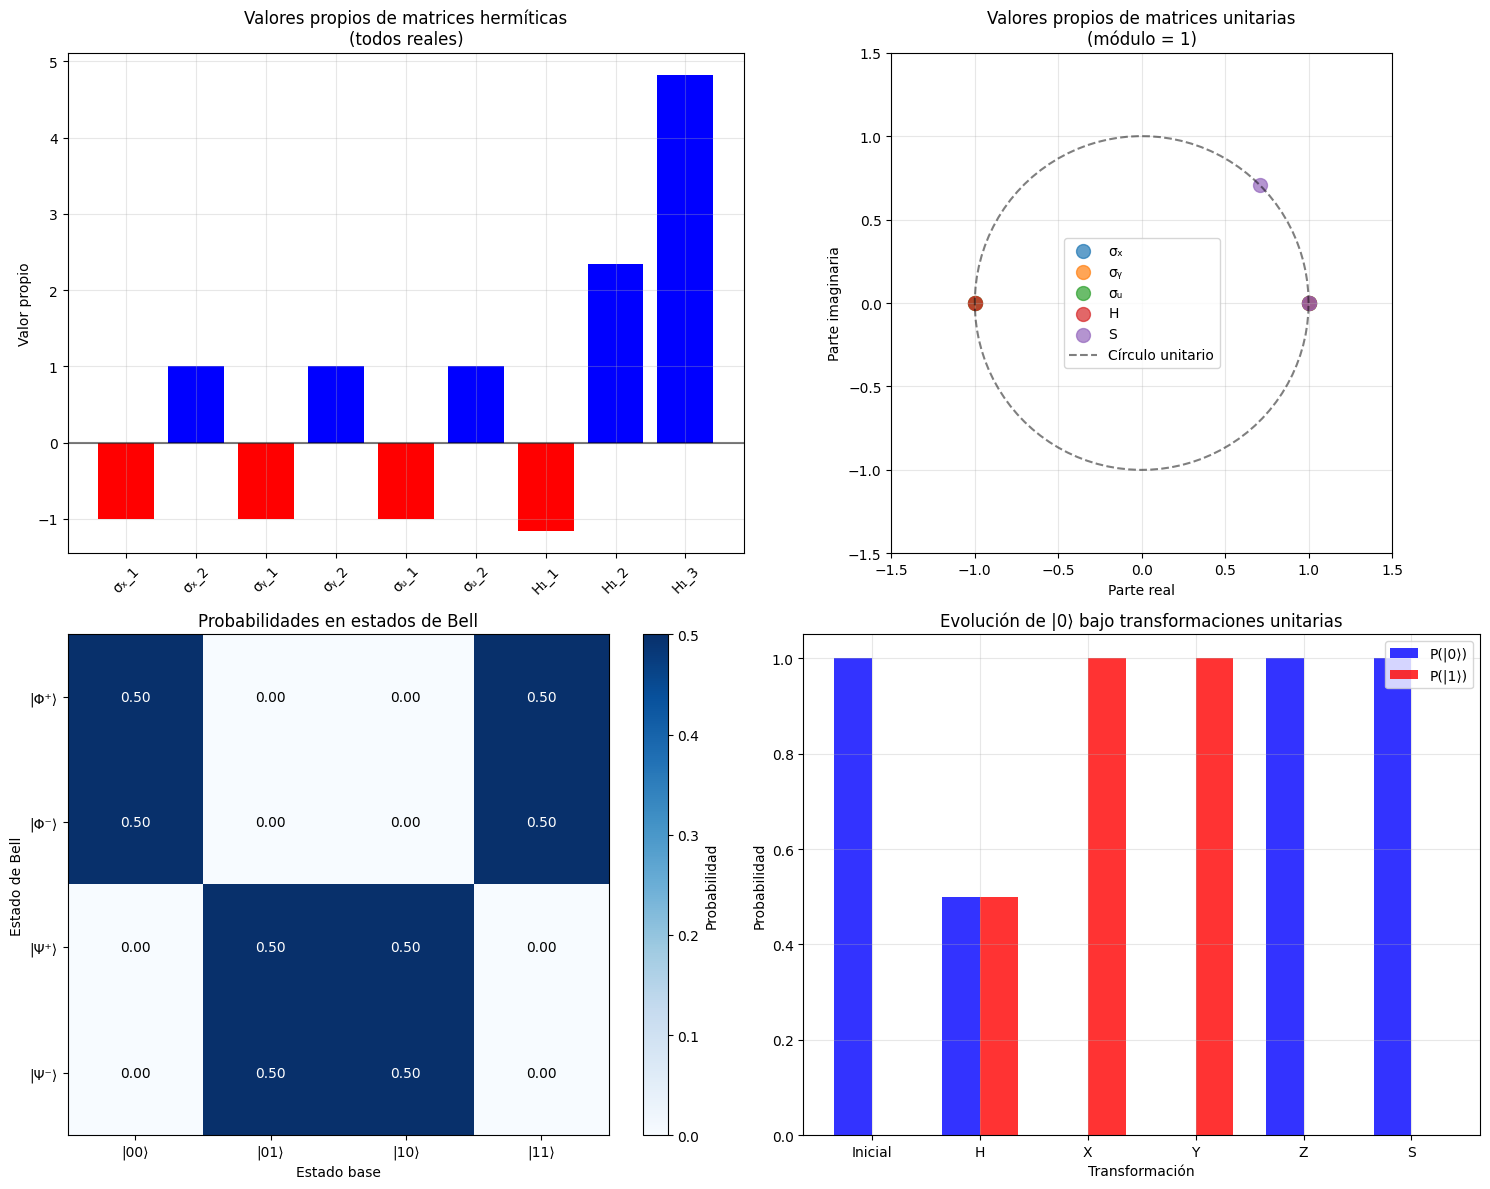


=== INTERPRETACIÓN DE VISUALIZACIONES ===
1. Valores propios hermíticos: Todos son reales, pueden ser positivos o negativos
2. Valores propios unitarios: Todos tienen módulo 1, están en el círculo unitario
3. Estados de Bell: Muestran entrelazamiento perfecto (solo |00⟩ y |11⟩ para |Φ±⟩)
4. Transformaciones: Diferentes puertas cuánticas producen diferentes distribuciones de probabilidad

Estos gráficos ilustran los conceptos fundamentales del álgebra lineal cuántica.


In [7]:
# Crear visualizaciones de los conceptos estudiados
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Valores propios de matrices hermíticas
ax1 = axes[0, 0]
matrices_hermiticas = [
    ('σₓ', sigma_x),
    ('σᵧ', sigma_y),
    ('σᵤ', sigma_z),
    ('H₁', H1)
]

nombres_h = []
valores_propios_h = []
for nombre, matriz in matrices_hermiticas:
    if matriz.shape[0] <= 3:  # Solo matrices pequeñas para visualización
        eigenvals, _ = np.linalg.eigh(matriz)
        for i, val in enumerate(eigenvals):
            nombres_h.append(f'{nombre}_{i+1}')
            valores_propios_h.append(np.real(val))

ax1.bar(range(len(valores_propios_h)), valores_propios_h, 
        color=['red' if v < 0 else 'blue' for v in valores_propios_h])
ax1.set_xticks(range(len(nombres_h)))
ax1.set_xticklabels(nombres_h, rotation=45)
ax1.set_ylabel('Valor propio')
ax1.set_title('Valores propios de matrices hermíticas\n(todos reales)')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5)

# Gráfico 2: Módulos de valores propios de matrices unitarias
ax2 = axes[0, 1]
matrices_unitarias = [
    ('σₓ', sigma_x),
    ('σᵧ', sigma_y), 
    ('σᵤ', sigma_z),
    ('H', H_gate),
    ('S', S_gate)
]

for i, (nombre, matriz) in enumerate(matrices_unitarias):
    eigenvals, _ = np.linalg.eig(matriz)
    modulos = np.abs(eigenvals)
    
    # Crear puntos en círculo unitario
    theta = np.angle(eigenvals)
    x = modulos * np.cos(theta)
    y = modulos * np.sin(theta)
    
    ax2.scatter(x, y, label=nombre, s=100, alpha=0.7)

# Dibujar círculo unitario
circle_theta = np.linspace(0, 2*np.pi, 100)
ax2.plot(np.cos(circle_theta), np.sin(circle_theta), 'k--', alpha=0.5, label='Círculo unitario')
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_xlabel('Parte real')
ax2.set_ylabel('Parte imaginaria')
ax2.set_title('Valores propios de matrices unitarias\n(módulo = 1)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

# Gráfico 3: Probabilidades en estados de Bell
ax3 = axes[1, 0]
bell_states = [bell_phi_plus, bell_phi_minus, bell_psi_plus, bell_psi_minus]
bell_names = ['|Φ⁺⟩', '|Φ⁻⟩', '|Ψ⁺⟩', '|Ψ⁻⟩']
base_names = ['|00⟩', '|01⟩', '|10⟩', '|11⟩']

# Crear matriz de probabilidades
prob_matrix = np.zeros((len(bell_states), 4))
for i, estado in enumerate(bell_states):
    prob_matrix[i, :] = np.abs(estado)**2

im = ax3.imshow(prob_matrix, cmap='Blues', aspect='auto')
ax3.set_xticks(range(4))
ax3.set_xticklabels(base_names)
ax3.set_yticks(range(len(bell_names)))
ax3.set_yticklabels(bell_names)
ax3.set_xlabel('Estado base')
ax3.set_ylabel('Estado de Bell')
ax3.set_title('Probabilidades en estados de Bell')

# Añadir valores de probabilidad
for i in range(len(bell_states)):
    for j in range(4):
        text = ax3.text(j, i, f'{prob_matrix[i, j]:.2f}',
                       ha="center", va="center", color="white" if prob_matrix[i, j] > 0.3 else "black")

plt.colorbar(im, ax=ax3, label='Probabilidad')

# Gráfico 4: Evolución de estado bajo transformaciones unitarias
ax4 = axes[1, 1]

# Evolución de |0⟩ bajo diferentes transformaciones
estado_inicial = estado_0
transformaciones = [
    ('Inicial', np.eye(2)),
    ('H', H_gate),
    ('X', sigma_x),
    ('Y', sigma_y),
    ('Z', sigma_z),
    ('S', S_gate)
]

probabilidades_0 = []
probabilidades_1 = []
nombres_trans = []

for nombre, U in transformaciones:
    estado_final = U @ estado_inicial
    prob_0 = np.abs(estado_final[0])**2
    prob_1 = np.abs(estado_final[1])**2
    
    probabilidades_0.append(prob_0)
    probabilidades_1.append(prob_1)
    nombres_trans.append(nombre)

x_pos = np.arange(len(nombres_trans))
width = 0.35

ax4.bar(x_pos - width/2, probabilidades_0, width, label='P(|0⟩)', alpha=0.8, color='blue')
ax4.bar(x_pos + width/2, probabilidades_1, width, label='P(|1⟩)', alpha=0.8, color='red')

ax4.set_xlabel('Transformación')
ax4.set_ylabel('Probabilidad')
ax4.set_title('Evolución de |0⟩ bajo transformaciones unitarias')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(nombres_trans)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== INTERPRETACIÓN DE VISUALIZACIONES ===")
print("1. Valores propios hermíticos: Todos son reales, pueden ser positivos o negativos")
print("2. Valores propios unitarios: Todos tienen módulo 1, están en el círculo unitario")
print("3. Estados de Bell: Muestran entrelazamiento perfecto (solo |00⟩ y |11⟩ para |Φ±⟩)")
print("4. Transformaciones: Diferentes puertas cuánticas producen diferentes distribuciones de probabilidad")
print("\nEstos gráficos ilustran los conceptos fundamentales del álgebra lineal cuántica.")